## **SMS SPAM DETECTION**

#### Our objective is to develop a machine learning classification model to accurately identify spam and legitimate (ham) SMS messages based on their content, using the SMS Spam Collection dataset.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### **importing our data**

In [2]:
file_path = "C:/Users/User/Downloads/spam.csv"

In [3]:
data = pd.read_csv(file_path, encoding='latin1')

#### **previewing data**

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


#### **dropping unnecessary columns**

In [6]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:
data.duplicated().sum()

403

#### **dropping duplicate rows**

In [8]:
data = data.drop_duplicates()
data.reset_index(inplace = True)

In [9]:
data

,index,v1,v2
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5164,5567,spam,This is the 2nd time we have tried 2 contact u...
5165,5568,ham,Will Ì_ b going to esplanade fr home?
5166,5569,ham,"Pity, * was in mood for that. So...any other s..."
5167,5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.drop('index', axis=1, inplace=True)

In [11]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [12]:
data.columns

Index(['v1', 'v2'], dtype='object')

#### **renaming the columns**

In [13]:
data.rename(columns={'v1': 'Target', 'v2': 'Message'}, inplace=True)

In [14]:
data.columns

Index(['Target', 'Message'], dtype='object')

In [15]:
data

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [16]:
data['Target'].unique()

array(['ham', 'spam'], dtype=object)

#### **changing the Target column to numeric values**

In [17]:
data['Target'] = data['Target'].map({'ham': 0, 'spam': 1})

In [18]:
data

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...
5165,0,Will Ì_ b going to esplanade fr home?
5166,0,"Pity, * was in mood for that. So...any other s..."
5167,0,The guy did some bitching but I acted like i'd...


where **0** is not spam and **1** is spam

### **Visualization**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#### **Distribution Plot**

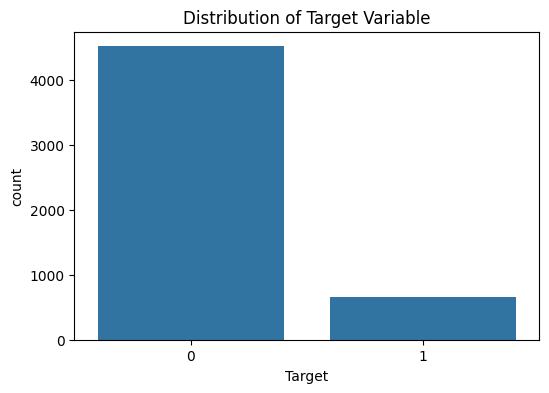

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

#### **Word Cloud**

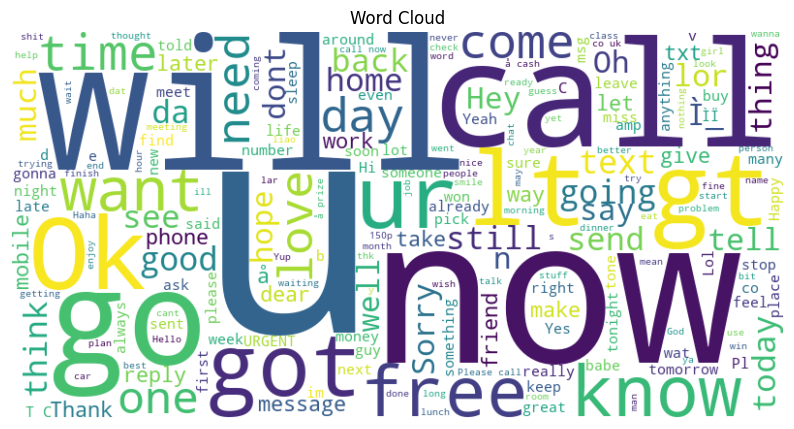

In [21]:
from wordcloud import WordCloud
all_messages = ' '.join(data['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

#### **DOWNSAMPLING our data**

Downsampling is often used in the context of handling imbalanced datasets. When one class is significantly overrepresented compared to another, downsampling can balance the dataset by reducing the number of samples in the majority class. This can help in training models that perform better on minority classes.

where **0** is not spam and **1** is spam

In [22]:
data['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

We can see that it is an imbalanced datasets.

#### **Let us downsample our dataset**

In [23]:
from sklearn.utils import resample

In [24]:
Not_spam = data[data.Target == 0]
Spam = data[data.Target == 1]

Not_spam_downsampled = resample(Not_spam, replace=False, n_samples=len(Spam), random_state=42)

data_downsampled = pd.concat([Spam, Not_spam_downsampled])

In [25]:
data_downsampled = data_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:
data_downsampled

,Target,Message
0,0,Yes I know the cheesy songs from frosty the sn...
1,1,FREEMSG: Our records indicate you may be entit...
2,0,Okie
3,0,Quite late lar... Ard 12 anyway i wun b drivin...
4,0,Those ducking chinchillas
...,...,...
1301,0,Gud ni8 dear..slp well..take care..swt dreams....
1302,0,Ah poop. Looks like ill prob have to send in m...
1303,0,You didnt complete your gist oh.
1304,0,"I'll text carlos and let you know, hang on"


### **Modeling**

In [27]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix

In [28]:
X = data_downsampled['Message']
Y = data_downsampled[['Target']]

#### **Text Vectorization**

In [29]:
vectorizer = TfidfVectorizer()

In [30]:
X_tfidf = vectorizer.fit_transform(X)

#### **Splitting into training and testing set**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y, test_size=0.3, random_state=42)

#### **Decision Tree Classifier**

In [32]:
dt_classifier = DecisionTreeClassifier()

In [33]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
dt_prediction = dt_classifier.predict(X_test)

In [35]:
dt_prediction

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [36]:
print("Accuracy Score : ", '{0:.2%}'.format(accuracy_score(y_test, dt_prediction)))

Accuracy Score :  92.86%


#### **Confusion Matrix**

<Axes: >

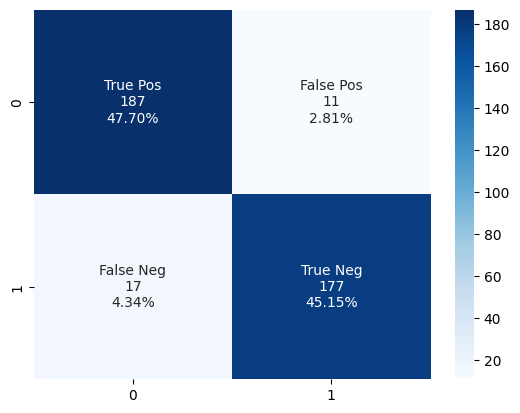

In [37]:
dt_cm = confusion_matrix(y_test, dt_prediction)
dt_names = ['True Pos','False Pos','False Neg','True Neg']
dt_counts = [value for value in dt_cm.flatten()]
dt_percentages = ['{0:.2%}'.format(value) for value in dt_cm.flatten()/np.sum(dt_cm)]
dt_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(dt_names, dt_counts, dt_percentages)]
dt_labels = np.asarray(dt_labels).reshape(2, 2)
sns.heatmap(dt_cm, annot=dt_labels, cmap='Blues', fmt='')

#### **Classification Report for Random Forest**

In [39]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       198
           1       0.94      0.91      0.93       194

    accuracy                           0.93       392
   macro avg       0.93      0.93      0.93       392
weighted avg       0.93      0.93      0.93       392



#### **Random Forest Classifier**

In [40]:
classifier = RandomForestClassifier()

In [41]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
prediction = classifier.predict(X_test)

In [43]:
prediction

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,

In [44]:
print("Accuracy Score : ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))

Accuracy Score :  94.90%


#### **Confusion Matrix for Random Forest**

<Axes: >

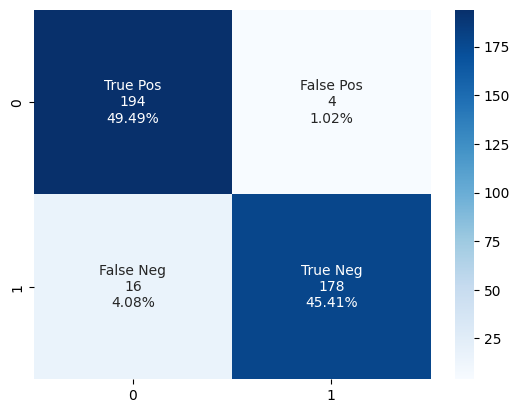

In [45]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, prediction)
rf_names = ['True Pos','False Pos','False Neg','True Neg']
rf_counts = [value for value in rf_cm.flatten()]
rf_percentages = ['{0:.2%}'.format(value) for value in rf_cm.flatten()/np.sum(rf_cm)]
rf_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(rf_names, rf_counts, rf_percentages)]
rf_labels = np.asarray(rf_labels).reshape(2, 2)
sns.heatmap(rf_cm, annot=rf_labels, cmap='Blues', fmt='')


#### **Classification Report for Random Forest**

In [46]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       198
           1       0.98      0.92      0.95       194

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392



### **Conclusion**

#### In conclusion, we developed a machine learning classification model using the SMS Spam Collection dataset to accurately distinguish between spam and legitimate SMS messages, thereby enhancing messaging experiences and reducing the impact of unwanted content on users.